In [1]:
import naiveautoml
naml = naiveautoml.NaiveAutoML(show_progress = True, max_hpo_iterations=10)

In [2]:
import sklearn.datasets
X, y = sklearn.datasets.load_iris(return_X_y=True)

In [3]:
naml.fit(X, y)

Progress for algorithm selection:


33it [00:04,  8.23it/s]                        


Progress for parameter turning:


100%|██████████| 10/10 [00:00<00:00, 41.26it/s]


In [4]:
naml.chosen_model

Pipeline(steps=[('data-pre-processor', PowerTransformer()),
                ('classifier',
                 QuadraticDiscriminantAnalysis(reg_param=0.004531891494660378))])

In [5]:
naml.history

[{'time': 0.04331707954406738,
  'pl': Pipeline(steps=[('classifier', SVC(kernel='sigmoid', probability=True))]),
  'score_internal': -1.063,
  'new_best': True},
 {'time': 0.05948591232299805,
  'pl': Pipeline(steps=[('classifier', SVC(kernel='poly', probability=True))]),
  'score_internal': -0.1263,
  'new_best': True},
 {'time': 0.06914949417114258,
  'pl': Pipeline(steps=[('classifier', QuadraticDiscriminantAnalysis())]),
  'score_internal': -0.0453,
  'new_best': True},
 {'time': 0.07885074615478516,
  'pl': Pipeline(steps=[('classifier', BernoulliNB())]),
  'score_internal': -1.0986,
  'new_best': False},
 {'time': 0.6091248989105225,
  'pl': Pipeline(steps=[('classifier', RandomForestClassifier())]),
  'score_internal': -0.3069,
  'new_best': False},
 {'time': 1.079136848449707,
  'pl': Pipeline(steps=[('classifier', ExtraTreesClassifier())]),
  'score_internal': -0.0978,
  'new_best': False},
 {'time': 1.0898473262786865,
  'pl': Pipeline(steps=[('classifier', DecisionTreeClass

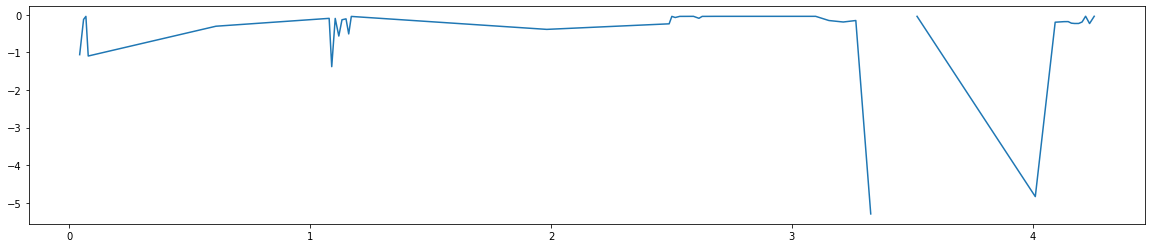

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot([e["time"] for e in naml.history], [e["score_internal"] for e in naml.history])
plt.show()

In [5]:
import sklearn.datasets
#X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X, y = sklearn.datasets.load_iris(return_X_y=True)

In [6]:
import openml
import pandas as pd
import scipy.sparse

from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix
import numpy as np

def get_dataset(openmlid):
    ds = openml.datasets.get_dataset(openmlid)
    df = ds.get_data()[0].dropna()
    y = df[ds.default_target_attribute].values

    categorical_attributes = df.select_dtypes(exclude=['number']).columns
    expansion_size = 1
    for att in categorical_attributes:
        expansion_size *= len(pd.unique(df[att]))
        if expansion_size > 10**5:
            break

    if expansion_size < 10**5:
        X = pd.get_dummies(df[[c for c in df.columns if c != ds.default_target_attribute]]).values.astype(float)
    else:
        print("creating SPARSE data")
        dfSparse = pd.get_dummies(df[[c for c in df.columns if c != ds.default_target_attribute]], sparse=True)

        print("dummies created, now creating sparse matrix")
        X = lil_matrix(dfSparse.shape, dtype=np.float32)
        for i, col in enumerate(dfSparse.columns):
            ix = dfSparse[col] != 0
            X[np.where(ix), i] = 1
        print("Done. shape is" + str(X.shape))
    return X, y

In [7]:
X, y = get_dataset(23517)

In [ ]:
naml.fit(X, y)

Progress for algorithm selection:


  0%|          | 0/31 [00:00<?, ?it/s]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/felix/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-7c3786146de2>", line 1, in <module>
    naml.fit(X, y)
  File "/home/felix/devel/naiveautoml/python/naiveautoml/naiveautoml.py", line 318, in fit
    self.choose_algorithms(X, y)
  File "/home/felix/devel/naiveautoml/python/naiveautoml/naiveautoml.py", line 178, in choose_algorithms
    score = pool.evaluate(pl, self.execution_timeout)
  File "/home/felix/devel/naiveautoml/python/naiveautoml/commons.py", line 85, in evaluate
    result = func_timeout(timeout, self.cross_validate, (pl, self.X, self.y, self.scoring))
  File "/home/felix/anaconda3/lib/python3.7/site-packages/func_timeout/dafunc.py", line 86, in func_timeout
    thread.join(timeout)
  File "/home/felix/anaconda3/lib/python3.7/threading.py", line 1048, in join
    self._wait_for_tstate_lock(timeout

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/felix/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-7c3786146de2>", line 1, in <module>
    naml.fit(X, y)
  File "/home/felix/devel/naiveautoml/python/naiveautoml/naiveautoml.py", line 318, in fit
    self.choose_algorithms(X, y)
  File "/home/felix/devel/naiveautoml/python/naiveautoml/naiveautoml.py", line 178, in choose_algorithms
    score = pool.evaluate(pl, self.execution_timeout)
  File "/home/felix/devel/naiveautoml/python/naiveautoml/commons.py", line 85, in evaluate
    result = func_timeout(timeout, self.cross_validate, (pl, self.X, self.y, self.scoring))
  File "/home/felix/anaconda3/lib/python3.7/site-packages/func_timeout/dafunc.py", line 86, in func_timeout
    thread.join(timeout)
  File "/home/felix/anaconda3/lib/python3.7/threading.py", line 1048, in join
    self._wait_for_tstate_lock(timeout

In [8]:
print(naml.chosen_model)

Pipeline(steps=[('data-pre-processor', PowerTransformer()),
                ('classifier',
                 QuadraticDiscriminantAnalysis(reg_param=0.007336800827281498))])


In [9]:
np.nanmax([e["score_internal"] for e in naml.history])

ERROR! Session/line number was not unique in database. History logging moved to new session 3255


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/felix/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-06e80dca4e66>", line 1, in <module>
    np.nanmax([e["score_internal"] for e in naml.history])
  File "<__array_function__ internals>", line 6, in nanmax
  File "/home/felix/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py", line 441, in nanmax
    res = np.amax(a, axis=axis, out=out, **kwargs)
  File "<__array_function__ internals>", line 6, in amax
  File "/home/felix/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 2755, in amax
    keepdims=keepdims, initial=initial, where=where)
  File "/home/felix/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 86, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
ValueError: zero-size array to reduction operation maximum which has n

TypeError: object of type 'NoneType' has no len()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot([e["time"] for e in naml.history], [e["score_internal"] for e in naml.history])
plt.show()